<a href="https://colab.research.google.com/github/NeerajVeerla/CVworkshop/blob/master/biometrics/Copy_of_FaceIdentification_IndianCeleb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
root = 'drive/MyDrive/cvit_ss_22'
import os
os.chdir(root)

Mounted at /content/drive


In [ ]:
#!unzip IMFDB.zip

# Face Identification using Indian Celebrity Dataset

In [2]:
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as  np

## Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification.

In [3]:
#Parameters
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [4]:
imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()
    
def display_image(path,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(4, 4))
    img = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
#     img = img.resize((opt['image_size'],opt['image_size']))
    img = np.array(img)
    img = img/256
    
    if opt['is_grayscale']:
        plt.imshow(img , cmap='gray') 
    else:
        plt.imshow(img)
        
    plt.axis('off')
    plt.show()

In [5]:
# Loading the dataset
dirpath = './IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
print(N,H,W)
C = 1 if opt['is_grayscale'] else X.shape[3]

Dataset shape: (400, 32, 32, 3)
400 32 32


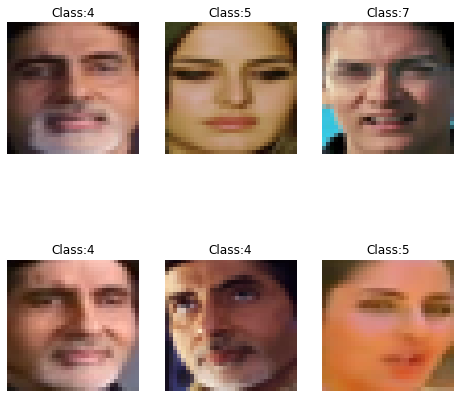

In [6]:
# Show sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

In [7]:
#Flattening the data
X = X.reshape((N,H*W*C))
print("Flattened Dataset shape:",X.shape)

Flattened Dataset shape: (400, 3072)


## Compute features for IMFDB using PCA and create a scatter plot

In [14]:
from sklearn.decomposition import PCA
def get_pca(X,k):
    """
        Get PCA of K dimension
        @return pca => PCA object for k components
        @return X_k => transformed X with k components
    """
    pca=PCA(n_components=k)

    X_k=pca.fit_transform(X,k)
    return X_k, pca

In [17]:

'''
  Compute your features for entire IMFDB data using get_pca()
'''
# Code here
k = 400   #specify the final dimension 'k' for PCA here
X_3D,pca=get_pca(X, k)

Text(0.5, 0.92, 'IMFDB')

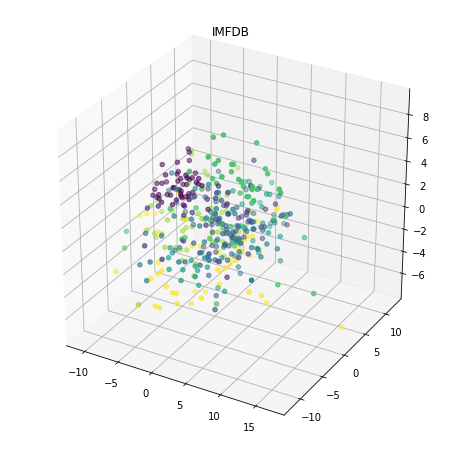

In [18]:
# Create a scatter plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y)
plt.title("IMFDB")

⚡**TODO**: Code the functions given inside the ```Classifier()``` class below.

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
# Define your classifier here. You can use libraries like sklearn to create your classifier 
class Classifier():
    def __init__(self,classifier_type):
        """
            @param classifier_type => Classification type
        """
        if classifier_type=="KNN":
            self.classifier = KNeighborsClassifier(n_neighbors=3)
            pass
        elif classifier_type=="mlp":
            self.classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,solver='lbfgs', verbose=10, tol=1e-4, random_state=10,learning_rate_init=.1)
        
    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
            @param X
            @return prediction
        """

        # Perform classifier.predict()

        prediction=self.classifier.predict(X)
        # Code here
        return prediction

    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
            @param y_train => N vector. Ground truth label 
            @param classifier_type => Classification type
            @return Nothing
        """
        # Perform classifier.fit()

        self.classifier.fit(X_train,y_train)
        # Code here
        
    def validate(self,X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.
            @param y_validate => N vector. Ground truth label    
            @return precision,recall,f1_score,accuracy
        """
        
        # Perform self.classify

        y_pred=self.classify(X_validate)
        # Calculate accuracy score
        
        accuracy=accuracy_score(y_validate, y_pred)
        # Calculate precision and recall 
        precision=precision_score(y_validate, y_pred,average='weighted')


        recall=recall_score(y_validate, y_pred,average='weighted')

        f1_score_=f1_score(y_validate, y_pred, average='weighted')
        
        # Calculate F1-score
        
        return precision,recall,f1_score_,accuracy


⚡**TODO**: Read about metrics - Precision, Recall and F1 score.

# Training the classifier

⚡**TODO**: Create a train and validation split (use sklearn) to train your classifier 

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train,y_val=train_test_split(X,y)

### Obtaining features using PCA

⚡**TODO**: 
- Perform PCA (use sklearn) on the train and validation data. 
- PCA will help reduce the dimensionality from 32x32x3 to k for each image. 
- Use the ```get_pca()``` function given above.

In [31]:
k = 80
X_k1,pca=get_pca(X_train, k)

X_k2=pca.transform(X_val)

⚡**TODO**: Train and validate your classifier using KNN (use sklearn) on the embeddings obtained after PCA. 

In [42]:
classifier_imfdb = Classifier('KNN')
classifier_imfdb.train(X_k1,y_train)
precision,recall,f1_score,accuracy=classifier_imfdb.validate(X_k2,y_val)


'''
    Code the following:
    1. Create a classifier object using classifier_imfdb = Classifier()
    2. Train the classifier using classifier_imfdb.train()
    3. Validate the classifier using classifier_imfdb.validate()
    4. Pass the required parameters. 
'''

# Code here

'\n    Code the following:\n    1. Create a classifier object using classifier_imfdb = Classifier()\n    2. Train the classifier using classifier_imfdb.train()\n    3. Validate the classifier using classifier_imfdb.validate()\n    4. Pass the required parameters. \n'

⚡**TODO**: Try different methods of classification like MLP, Logistic Regression etc. (optional) and display the accuracies using the below table.

In [44]:
import pandas as pd
Method = ['PCA+KNN']
Accuracy = [accuracy]
F1_score = [f1_score]
list_of_tuples = list(zip(Method,Accuracy,F1_score))
df = pd.DataFrame(list_of_tuples,columns = ['Method','Accuracy','F1_score'])
df

,Method,Accuracy,F1_score
0,PCA+KNN,0.15,0.113923


## Testing the classifier - Face Identification

⚡**TODO**: Test the given celebrity image and find out the prediction.

(32, 32, 3)


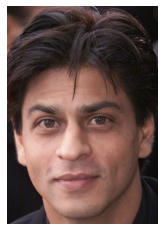

In [45]:
dirpath = './images/unknownceleb.png'
img = load_image(dirpath)
print(img.shape)
display_image(dirpath)

In [49]:
img=img.reshape(1,-1)

pca_img=pca.transform(img)

prediction=classifier_imfdb.classify(pca_img)
print(prediction)



[2]


⚡**TODO**: Click a picture of yourself and use KNN to determine the celebrity you resemble the most.

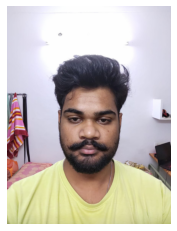

In [50]:
dirpath = '/content/WhatsApp Image 2022-05-23 at 3.06.19 PM.jpeg'
img = load_image(dirpath)
display_image(dirpath)

In [51]:
img1=img.reshape(1,-1)

pca_img1=pca.transform(img1)

prediction1=classifier_imfdb.classify(pca_img1)

print(prediction1)






[0]


⚡**TODO**: Find out the difference between face identification and verification.